In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import datetime as d
import pandas as pd
import os.path as path
import time
import pytz

tempStringPickle = '/Users/edwardlrichards/cir_processing/Enviornment/processedData/WHOI_Temp_String.pic'
thermString = pd.read_pickle(tempStringPickle)

In [13]:
sensorDepths = thermString.columns

In [14]:
HST = pytz.timezone('US/Hawaii')
majorLoc = dates.DayLocator(interval=2, tz=HST)
minorLoc = dates.HourLocator(byhour=[0,12], tz=HST)
majorFmt = dates.DateFormatter("%m/%d")

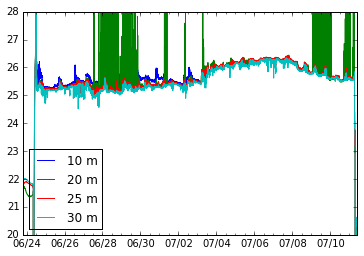

In [15]:
# plot shallow sensors
plotShallow = sensorDepths[sensorDepths <= 30]
fig, ax = plt.subplots()
for depth in plotShallow:
    _ = ax.plot(thermString.index, thermString[depth], '-', label = '%i m'%depth)
_ = ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_minor_locator(minorLoc)
_ = ax.xaxis.set_major_formatter(majorFmt)
_ = plt.ylim(20, 28)
_ = plt.legend(loc=3)

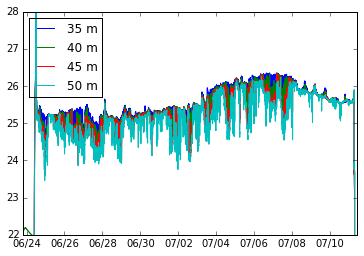

In [16]:
# plot shallow middle sensors
plotShallow = sensorDepths[np.bitwise_and((sensorDepths > 30), (sensorDepths <= 50))]
fig, ax = plt.subplots()
for depth in plotShallow:
    _ = ax.plot(thermString.index, thermString[depth], '-', label = '%i m'%depth)
_ = ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_major_formatter(majorFmt)
_ = plt.ylim(22, 28)
_ = plt.legend(loc=2)

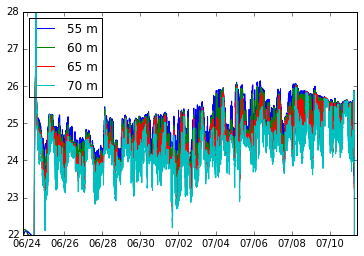

In [17]:
# plot deep middle sensors
plotShallow = sensorDepths[np.bitwise_and((sensorDepths > 50), (sensorDepths <= 70))]
fig, ax = plt.subplots()
for depth in plotShallow:
    _ = ax.plot(thermString.index, thermString[depth], '-', label = '%i m'%depth)
_ = ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_major_formatter(majorFmt)
_ = plt.ylim(22, 28)
_ = plt.legend(loc=2)

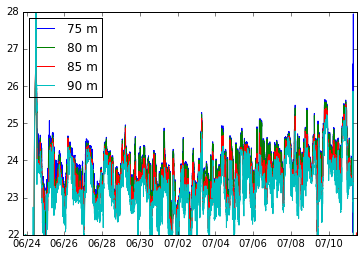

In [18]:
# plot deep sensors
plotShallow = sensorDepths[sensorDepths > 70]
fig, ax = plt.subplots()
for depth in plotShallow:
    _ = ax.plot(thermString.index, thermString[depth], '-', label = '%i m'%depth)
_ = ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_major_formatter(majorFmt)
_ = plt.ylim(22, 28)
_ = plt.legend(loc=2)

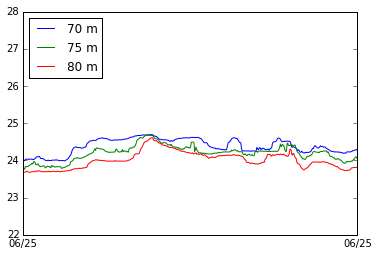

In [19]:
# check for timing offset on starmon sensors
plotShallow = [70,75,80]
fig, ax = plt.subplots()
for depth in plotShallow:
    _ = ax.plot(thermString.index, thermString[depth], '-', label = '%i m'%depth)
_ = ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_minor_locator(minorLoc)
_ = ax.xaxis.set_major_formatter(majorFmt)
_ = plt.ylim(22, 28)
_ = plt.legend(loc=2)
_ = plt.xlim(thermString.index[5200], thermString.index[5700])

In [20]:
DT = np.tile(thermString.index, (thermString.columns.size, 1))
DEPTHS = np.tile(thermString.columns, (thermString.index.size, 1)).T

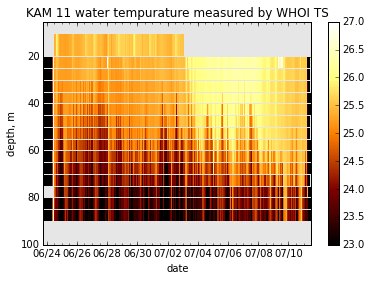

In [23]:
palette = cmap=plt.cm.afmhot
palette.set_bad(alpha=0)
Zm = np.ma.masked_where(np.isnan(np.array(thermString).T), np.array(thermString).T)
fig, ax = plt.subplots()
ax.set_axis_bgcolor((0.9, 0.9, 0.9))
c = ax.pcolormesh(DT, DEPTHS, Zm, vmin=23, vmax=27,
                 cmap=palette)
ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_minor_locator(minorLoc)
ax.xaxis.set_major_formatter(majorFmt)
cbar = fig.colorbar(c)
_ = ax.set_ylim(100, 5)
_ = plt.title('KAM 11 water tempurature measured by WHOI TS')
_ = plt.xlabel('date')
_ = plt.ylabel('depth, m')